# **AI Heatlh Guard Visualization On Encoded Dataset**

# **Welcome to AI-Health Guard Research Paper**



> AI HEALTH GUARD
* Your Personalized Health Advisor. Predicts diseases, offers
tailored medical advice, workouts, and diet plans for holistic
well-being.

---

# **About Dataset**
### **Context**
---
> The data for "AI HEALTH GUARD" is from [Kaggle](https://www.kaggle.com/datasets/alokchoudhary2005/ai-health-guarda), a platform for data scientists and machine learning engineers. This dataset includes 8 `csv` files

**● Symptom-severity.csv:** Describes the severity of specific symptoms.

**● Original_Dataset.csv:** The main dataset used to train the machine learning model.

**● description.csv**: Gives detailed descriptions of the health conditions.

**● diets.csv:** Provides information about which diets are appropriate for various health conditions.

**● medications.csv**: Gives details of when and how to take what kind of medication, should you need some.

**● precautions_df.csv:** Lists the different precautions that you are advised to adopt when facing various health conditions.

**● symtoms_df.csv:** Contains an exhaustive list of symptoms presented by different illnesses.

**● workout_df.csv:** Lists planned ways that are suited to an individual's specific health demands and encompasses work-outs combined with lifestyle advice for a healthy lifestyle

### **Data Analysis Insight:**
* Insights from data analysis shed light on trends, patterns and correlations
between symptoms and health conditions.

### **Recommendation Generation:**
* The recommendation generation process involves analyzing user-input symptoms
and generating personalized health recommendations.


---

## **Conclusion**
* The AI Health Guard project represents a significant endeavor in utilizing data science and machine learning techniques to empower individuals in managing their health effectively. By leveraging advanced algorithms and personalized recommendations, the system aims to enhance healthcare outcomes and promote overall well-being.

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud
import networkx as nx

import warnings
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/Original_Dataset.csv')
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(4920, 18)

## Finding unique values across all the symptoms column

In [ ]:
columns_to_check = []
for col in df.columns:
    if col != 'Disease':
        columns_to_check.append(col)

In [ ]:
symptoms = df.iloc[:, 1:].values.flatten()
symptoms = list(set(symptoms))

## Convert Symptoms to Binary Columns

In [ ]:
for symptom in symptoms:
    df[symptom] = df.iloc[:, 1:].apply(lambda row: int(symptom in row.values), axis=1)

df_v1 = df.drop(columns=columns_to_check)

In [ ]:
df_v1 = df_v1.loc[:, df_v1.columns.notna()]

In [ ]:
df_v1.shape

(4920, 132)

* Now shape of dataset is `4920` rows and `132` columns.

In [ ]:
df_v1.columns = df_v1.columns.str.strip()

In [ ]:
df_v1.columns

Index(['Disease', 'cramps', 'weight_loss', 'yellow_urine',
       'swelled_lymph_nodes', 'pus_filled_pimples', 'swelling_of_stomach',
       'puffy_face_and_eyes', 'scurring', 'lethargy',
       ...
       'drying_and_tingling_lips', 'yellowing_of_eyes', 'coma', 'mild_fever',
       'skin_rash', 'visual_disturbances', 'abnormal_menstruation',
       'breathlessness', 'family_history', 'extra_marital_contacts'],
      dtype='object', length=132)

In [ ]:
df_v1.head(5)

,Disease,cramps,weight_loss,yellow_urine,swelled_lymph_nodes,pus_filled_pimples,swelling_of_stomach,puffy_face_and_eyes,scurring,lethargy,...,drying_and_tingling_lips,yellowing_of_eyes,coma,mild_fever,skin_rash,visual_disturbances,abnormal_menstruation,breathlessness,family_history,extra_marital_contacts
373,Acne,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4916,Acne,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1550,Hyperthyroidism,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3081,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3857,Chronic cholestasis,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Heatmap: Correlation Between Symptoms
# Select symptom columns
symptom_columns = df_v1.columns[1:]
# Calculate the correlation matrix
correlation_matrix = df_v1[symptom_columns].corr()
# Create a heatmap with Plotly
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.index, colorscale='Viridis',
                colorbar=dict(title="Correlation"), zmin=-1, zmax=1))
# Optimize annotations: only show for high absolute correlation values
threshold = 0.5
annotations = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        if abs(value) >= threshold:
            annotations.append(dict(x=correlation_matrix.columns[j], y=correlation_matrix.index[i], text=str(round(value, 2)), showarrow=False,
                    font=dict(color='white' if abs(value) > 0.5 else 'black')))

fig.update_layout(title='Correlation Between Symptoms', xaxis_title='Symptoms', yaxis_title='Symptoms', annotations=annotations, xaxis=dict(tickangle=45))
fig.show()

* The heatmap shows the correlation between different pairs of symptoms. Each row and column of the heatmap represents a symptom. The color intensity in each cell indicates the strength of the correlation between the two symptoms represented by that row and column. Darker colors represent stronger correlations, either positive or negative.

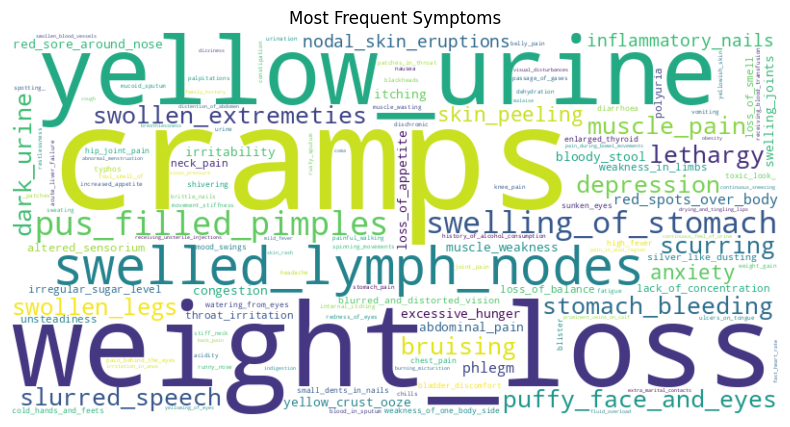

In [ ]:
# Word Cloud: Most Frequent Symptoms
# Combine all symptoms into a single string
symptoms = ' '.join(df_v1.columns[1:])
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Symptoms')
plt.show()

*  A word shown in `big size` indicates that it is used more times.

In [ ]:
# Scatter Plot Matrix: Relationships Between Symptoms
# Select a subset of symptoms for better visualization
selected_symptoms = df_v1.columns[1:10]
fig = px.scatter_matrix(df_v1, dimensions=selected_symptoms, color='Disease', title='Exploring Symptom Relationships')
fig.show()

* It show the relationships between different symptoms. Each small square graph shows the correlation between two specific symptoms.

In [ ]:
# To visualize the relationships between different symptoms and diseases.
# Create a parallel categories diagram
fig = px.parallel_categories(df_v1, dimensions=['Disease', 'family_history', 'muscle_weakness', 'silver_like_dusting'],
                             title="Multidimensional Relationships Between Diseases and Symptoms", color_continuous_scale='viridis')
fig.show()

* It show relationships between multiple categorical variables. In this example, the categories are different diseases and symptoms. Each vertical axis represents a single variable, and each data point is a combination of categories across all variables. Lines connect the data points, showing how different categories co-occur.

In [ ]:
# To show the hierarchical structure of symptoms and diseases.
# Create a sunburst chart
fig = px.sunburst(df_v1, path=['Disease', 'family_history', 'muscle_weakness'], title='Hierarchical Structure of Symptoms and Diseases')
fig.show()

* The chart shows a hierarchical structure of symptoms and diseases. The center circle represents all diseases, and the outer rings represent increasingly specific categories of symptoms.

In [ ]:
# To explore the distribution of diseases in a 3D space based on selected symptoms.
# Create a 3D scatter plot
fig = px.scatter_3d(df_v1, x='family_history', y='muscle_weakness', z='silver_like_dusting', color='Disease', title='Exploring Multidimensional Symptom Relationships')
fig.show()

* The plot show the distribution of data points across three dimensions, which represent selected symptoms. Each data point represents a patient, and the position of the point along each axis corresponds to the severity or presence of a particular symptom.  For example, one axis might represent `muscle weakness`, another  `family history`, and the third `silver-like dusting`.  By examining the position of the data points in 3D space, you can see how the different symptoms co-occur in the patient population.

In [ ]:
# To show the flow from symptoms to diseases.
# Define the nodes and links for the Sankey diagram
nodes = list(df_v1['Disease'].unique()) + list(df_v1.columns[1:10])
links = []

for disease in df_v1['Disease'].unique():
    for symptom in df_v1.columns[1:10]:
        count = df_v1[(df_v1['Disease'] == disease) & (df_v1[symptom] == 1)].shape[0]
        if count > 0:
            links.append({'source': nodes.index(symptom), 'target': nodes.index(disease), 'value': count})
# Create the Sankey diagram
fig = go.Figure(go.Sankey(node=dict( pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes),
    link=dict( source=[link['source'] for link in links], target=[link['target'] for link in links], value=[link['value'] for link in links])))
fig.update_layout(title_text="Flows Between Diseases and Symptoms", font_size=10)
fig.show()

* The diagram show the flow of patients between different diseases and related symptoms. The width of the arrows represents the number of patients experiencing a particular symptom or disease.

In [ ]:
# To visualize the occurrence of diseases with varying symptom counts.
# Create a bubble chart
df_v1['symptom_count'] = df_v1.iloc[:, 1:].sum(axis=1)
fig = px.scatter(df_v1, x='Disease', y='symptom_count', size='symptom_count', color='Disease', title='Bubble Chart of Disease Symptom Counts')
fig.show()

* The chart shows the number of symptoms associated with various diseases. The size of the bubble corresponds to the number of symptoms.

In [ ]:
# Create the graph
G = nx.Graph()
# Add nodes and edges
diseases = df_v1['Disease'].unique()
symptoms = df_v1.columns[1:]
# Add disease nodes
for disease in diseases:
    G.add_node(disease, type='disease')
# Add symptom nodes and edges
for symptom in symptoms:
    G.add_node(symptom, type='symptom')
    for disease in diseases:
        if df_v1[df_v1['Disease'] == disease][symptom].sum() > 0:
            G.add_edge(disease, symptom)
# Define node positions using a spring layout
pos = nx.spring_layout(G)
# Create edge traces
edge_trace = go.Scatter( x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node traces
node_trace = go.Scatter( x=[], y=[], text=[], mode='markers+text', textposition='top center', hoverinfo='text',
    marker=dict( showscale=True, colorscale='YlGnBu', size=10, colorbar=dict( thickness=15, title='Node Connections', xanchor='left', titleside='right'), color=[]))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)
    node_trace['marker']['color'] += (G.degree(node),)

# Create the plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='Disease-Symptom Network', titlefont_size=16, showlegend=False, hovermode='closest', margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(text="Network graph of diseases and symptoms (by Alok Choudhary)", showarrow=False, xref="paper", yref="paper", x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.show()

* Nodes in the graph represent various diseases and symptoms. Edges connect nodes that are frequently co-occur together. Thicker edges indicate stronger connections.

In [ ]:
# Create a hexbin plot
fig = px.density_heatmap(df_v1, x='family_history', y='muscle_weakness', nbinsx=20, nbinsy=20, title='Distribution of Family History and Muscle Weakness')
fig.show()

* It shows the distribution of co-occurrences between two variables: `family_history` and `muscle_weakness`. Each hexagon represents a count of patients. The position of the hexagon on the x-axis indicates the value for `family_history`, and the position on the y-axis indicates the value for `muscle_weakness`. The size of the hexagon represents the number of patients who have that combination of `family_history` and `muscle_weakness` values.

## **Thanks**